In [ ]:
Step 4: Use AWS SCT to Convert the Oracle Schema to PostgreSQL
--------------------------------------------------------------------

Launch AWS SCT. In AWS SCT, choose File, then choose New Project

Choose Add source to add a source Oracle database to your project

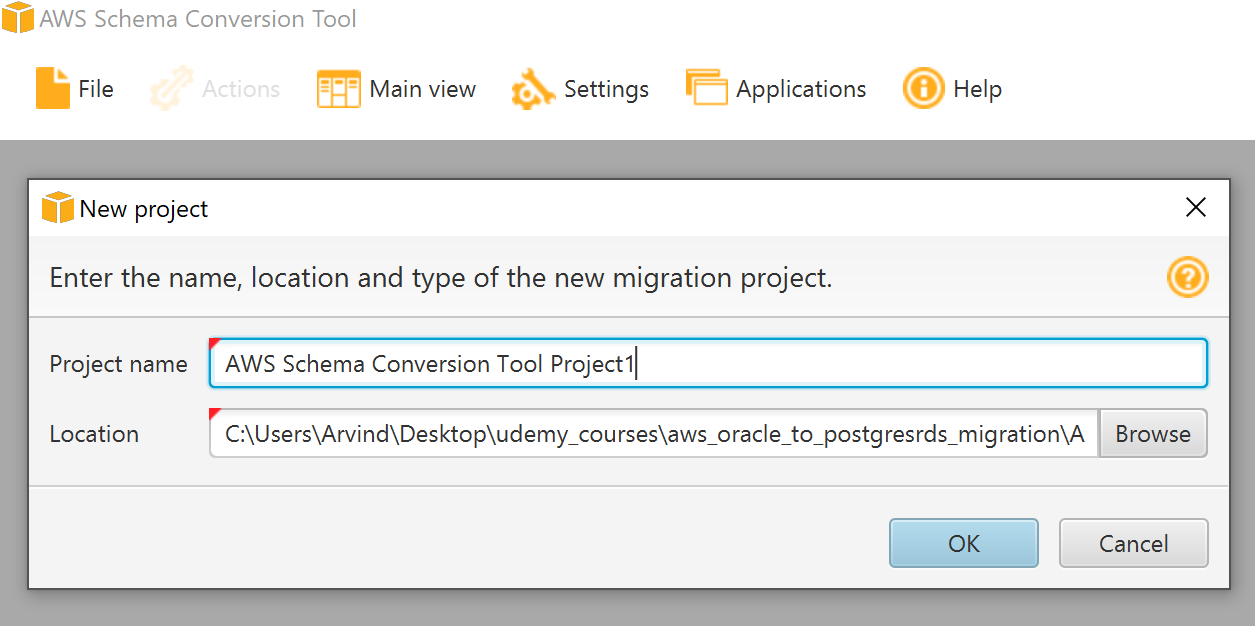

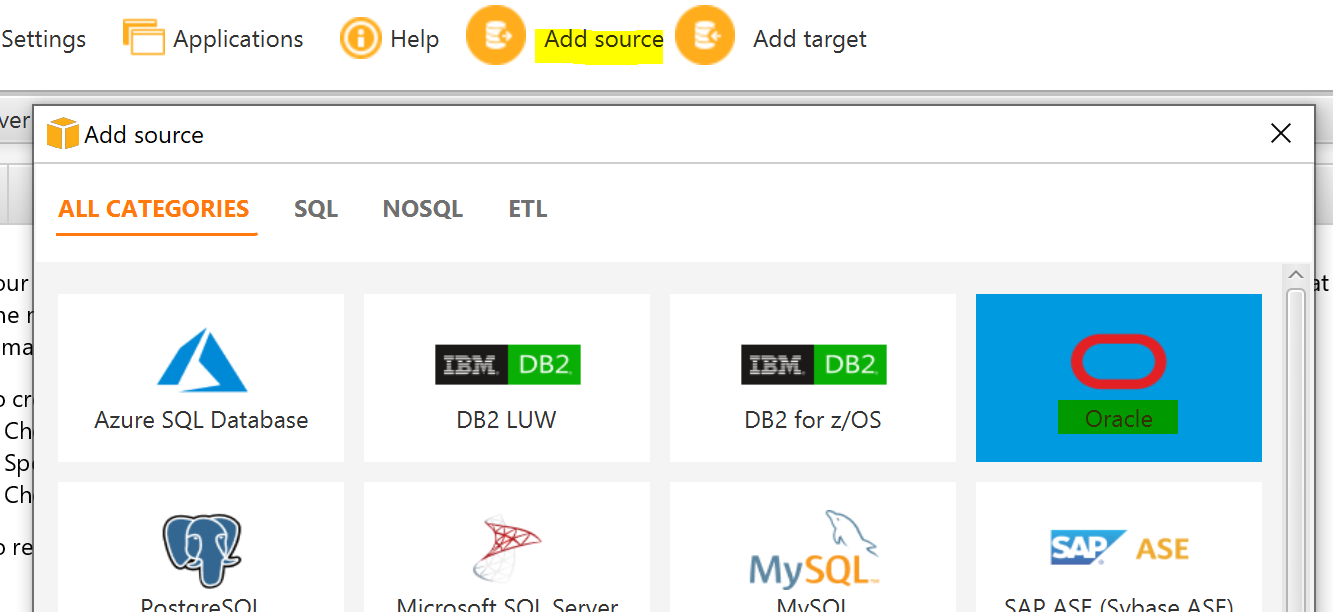

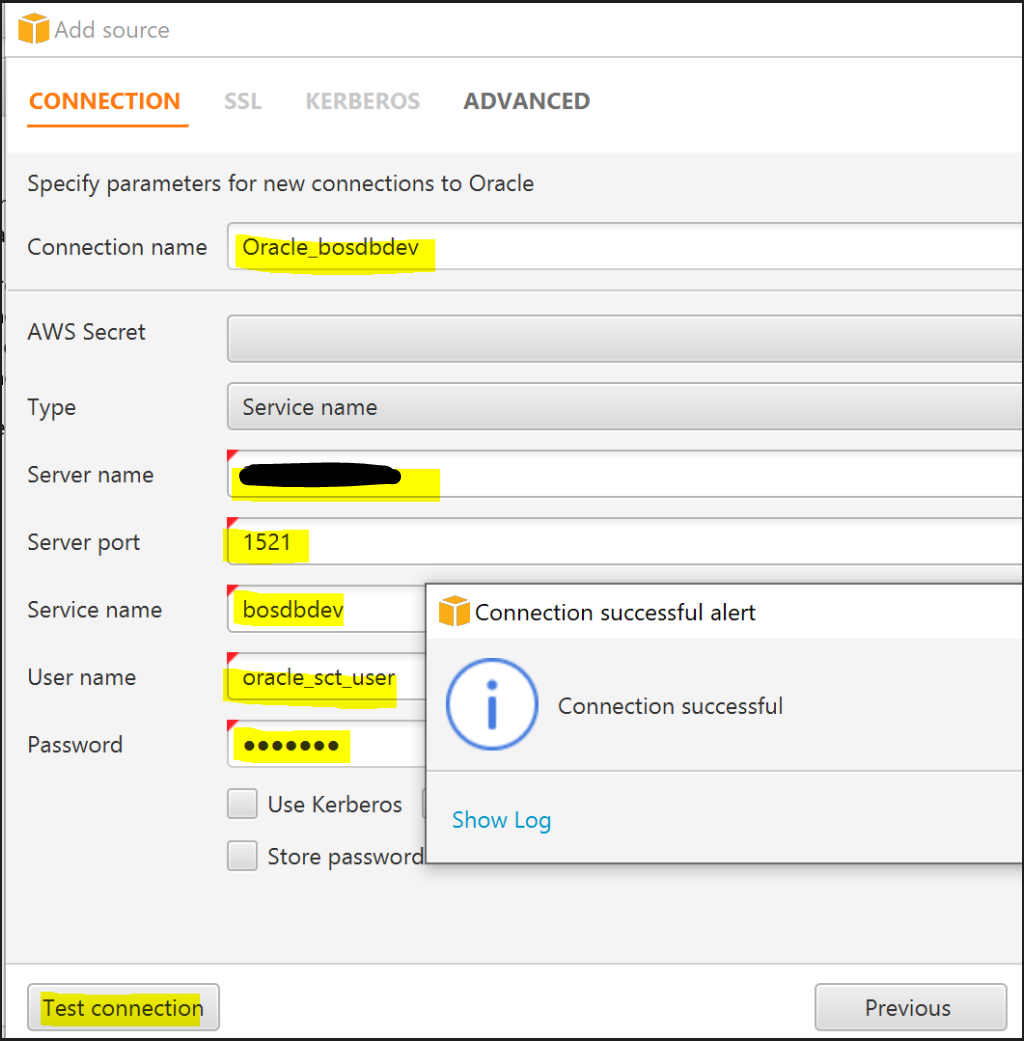

In [ ]:
Choose Add target to add a target PostgreSQL database to your project, then choose Amazon RDS for PostgreSQL

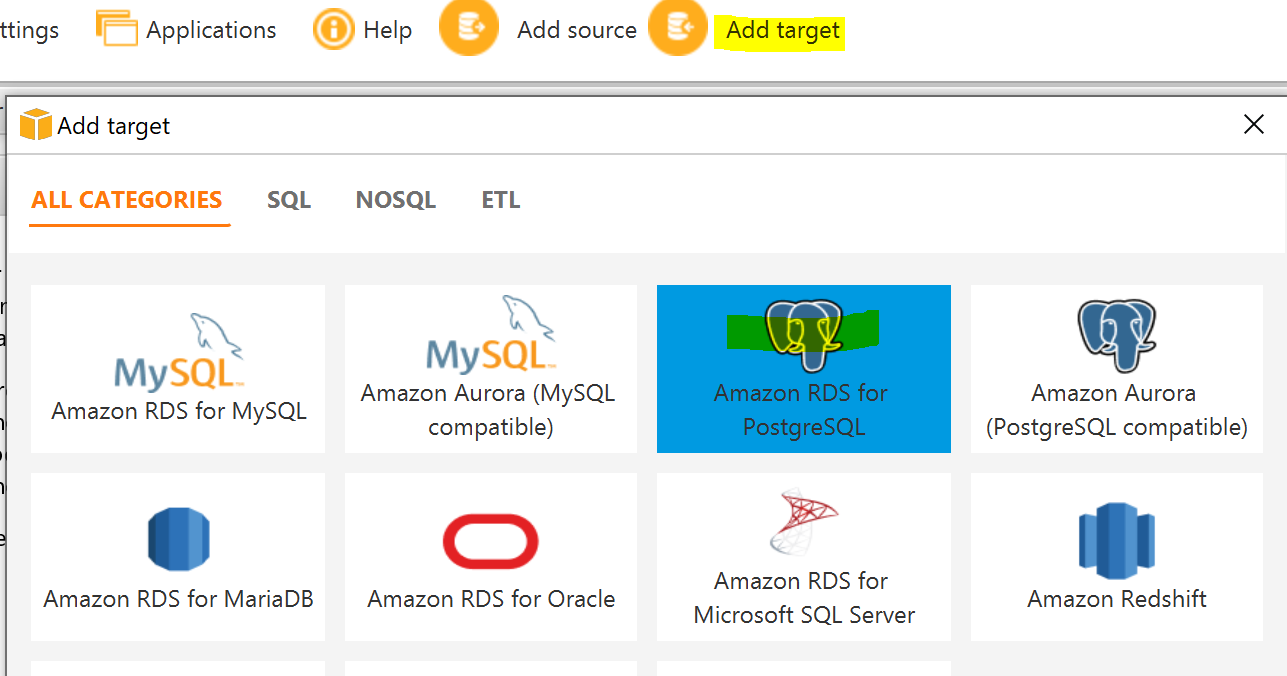

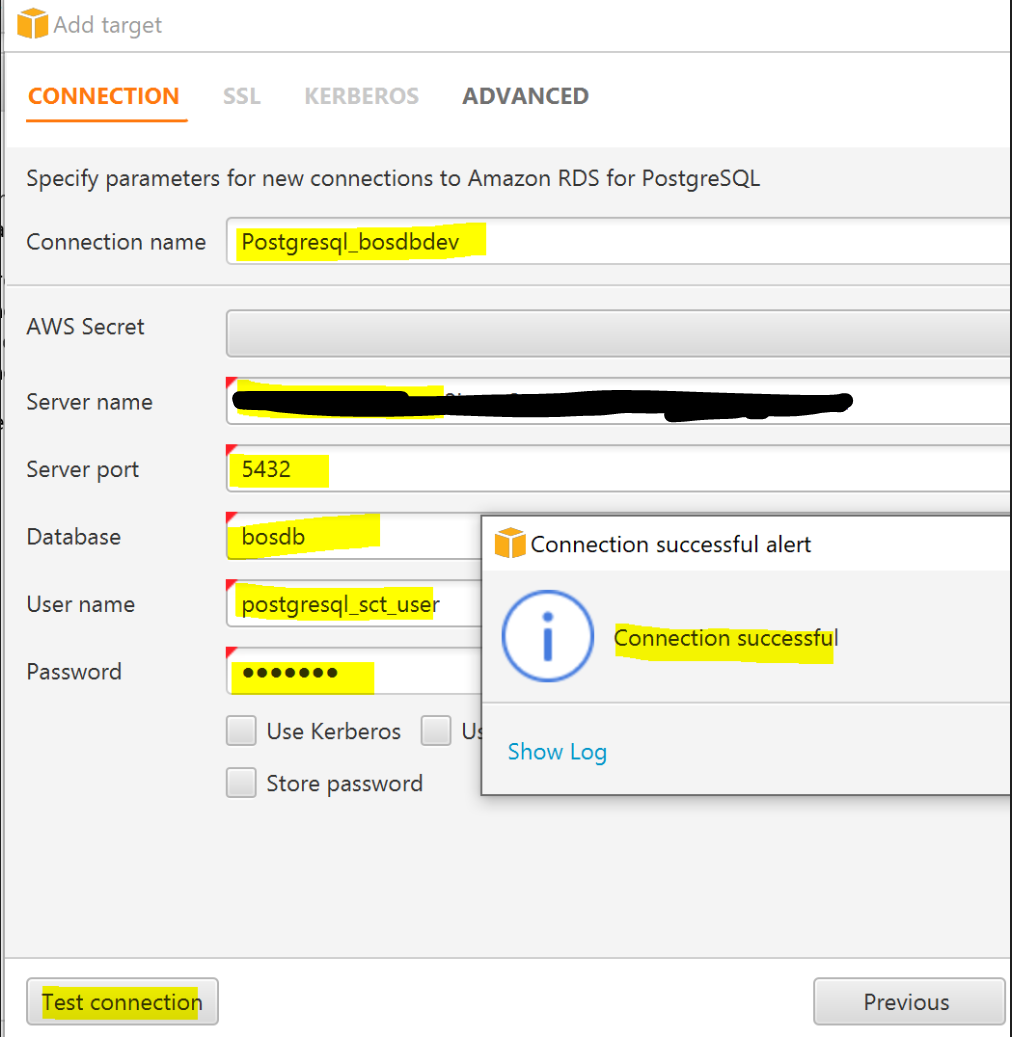

In [ ]:
In the tree in the left panel, select the schema to migrate. In the tree in the right panel, select your target Amazon 
RDS for PostgreSQL database. Choose Create mapping. 

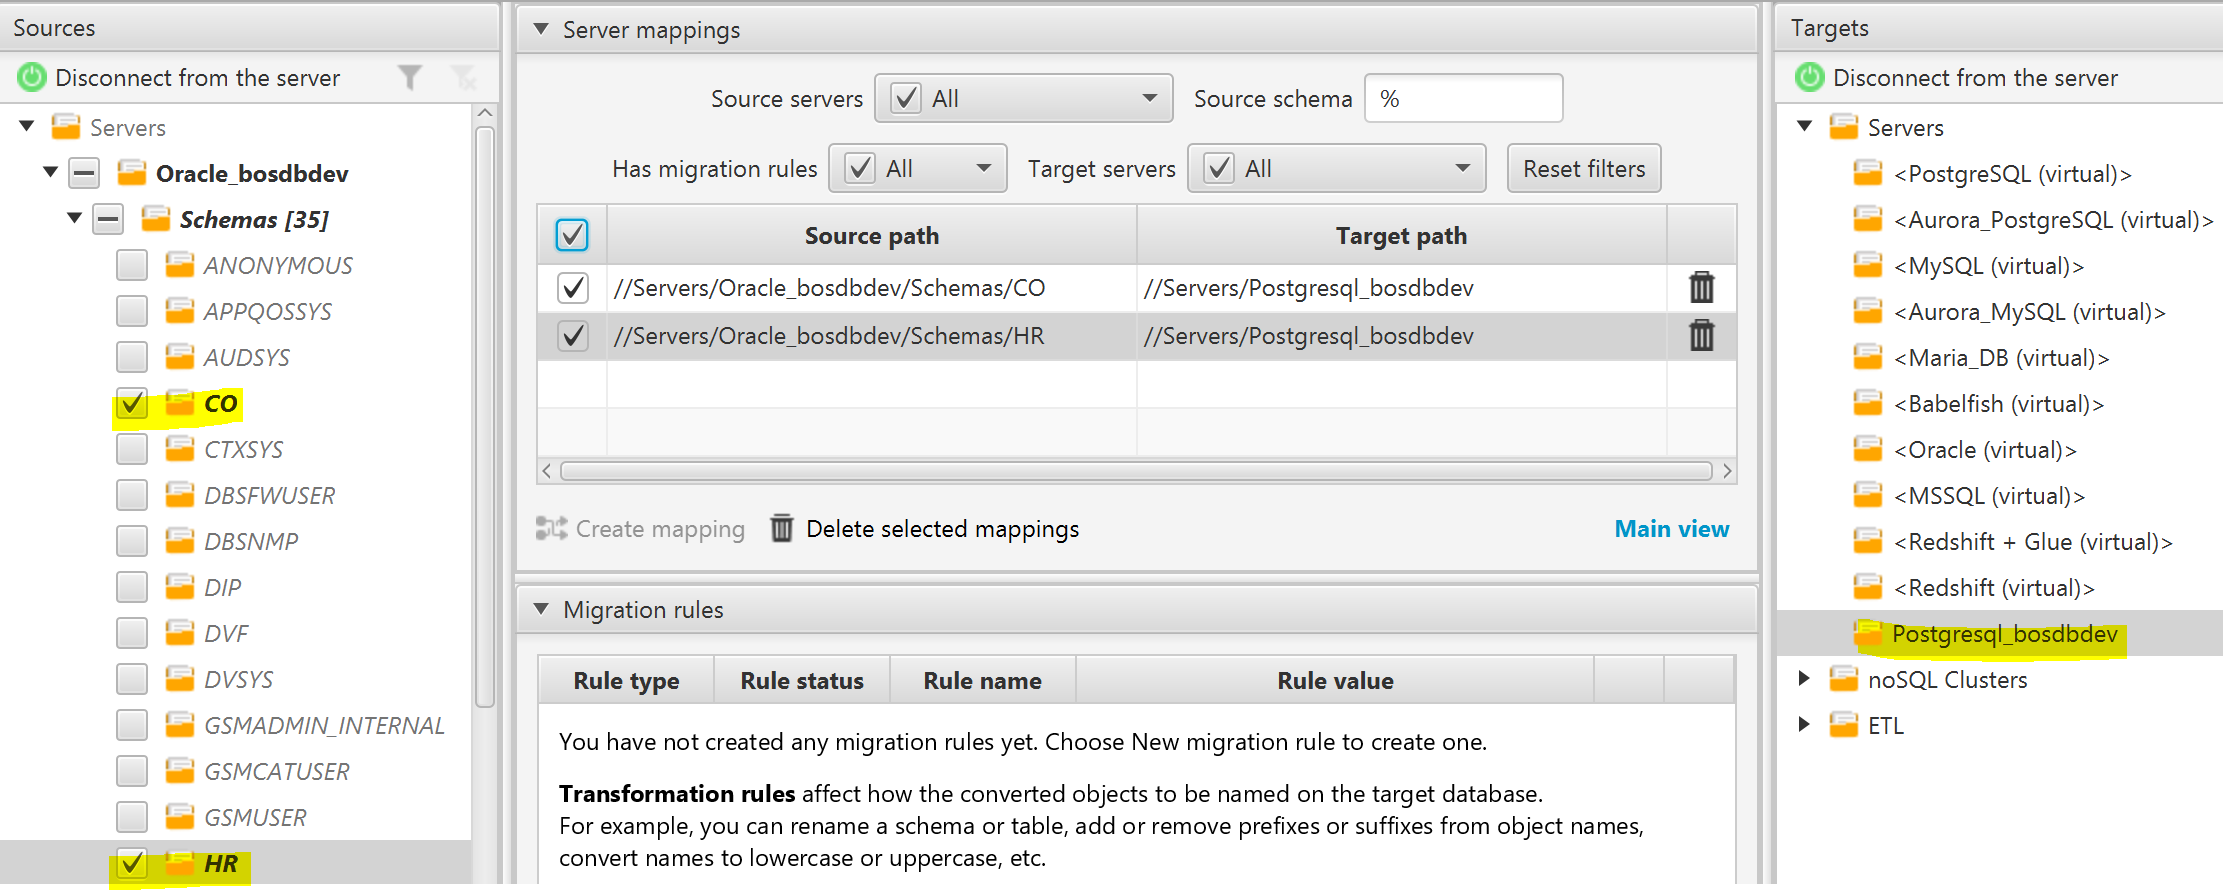

In [ ]:
Choose Main view. In the tree in the left panel, right-click the schema to migrate and choose Convert schema.

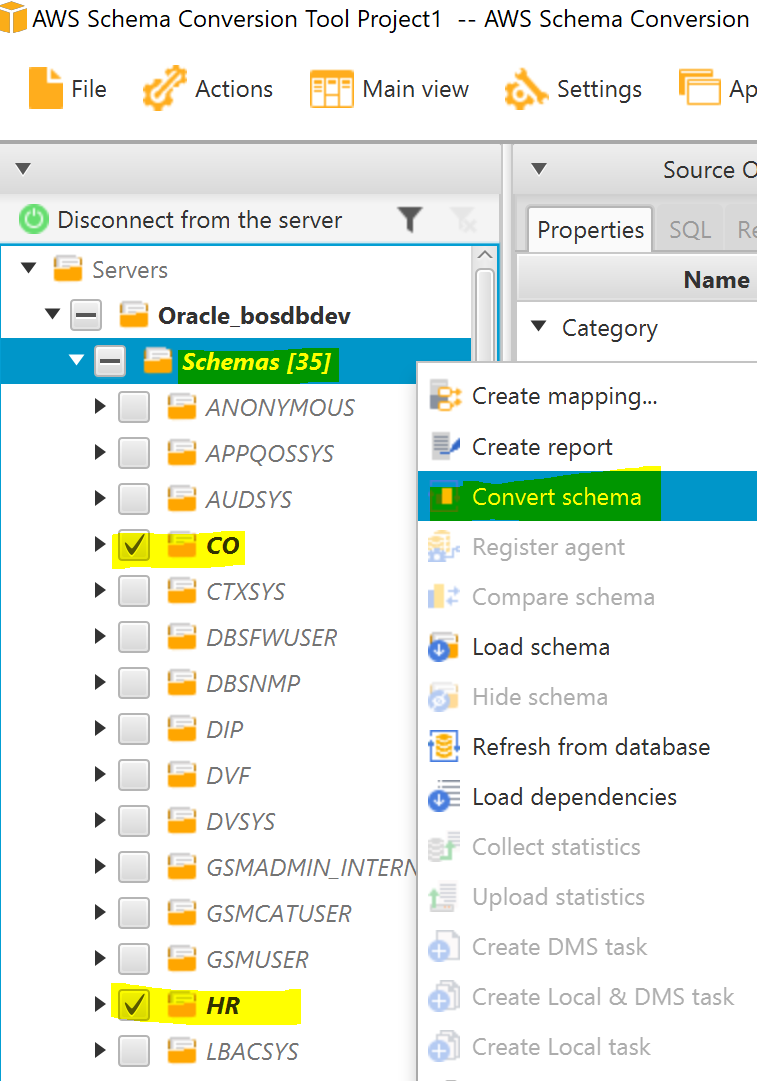

In [ ]:
Choose Assessment Report View from the menu to check the database migration assessment report. 
The report breaks down by each object type and by how much manual change is needed to convert it successfully.

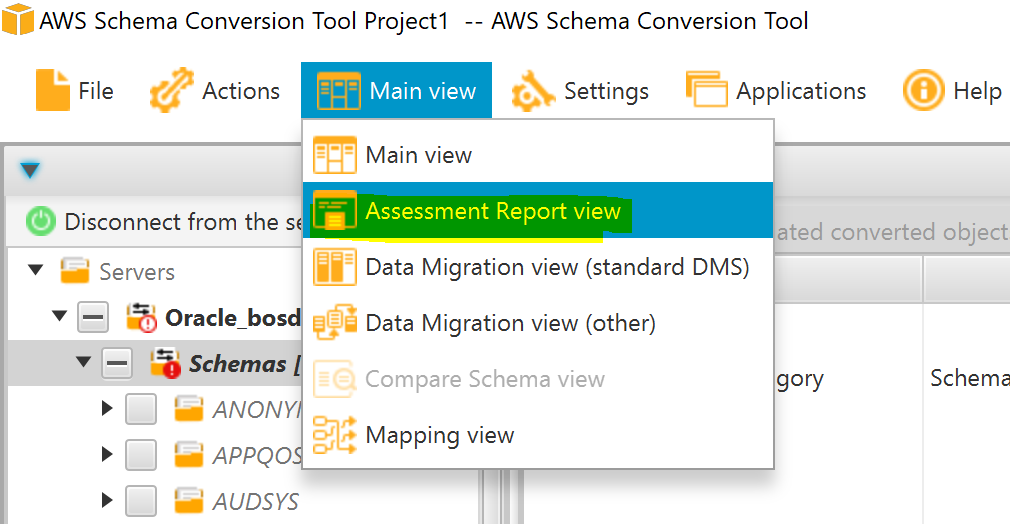

In [ ]:
Save the reports both CSV and PDF

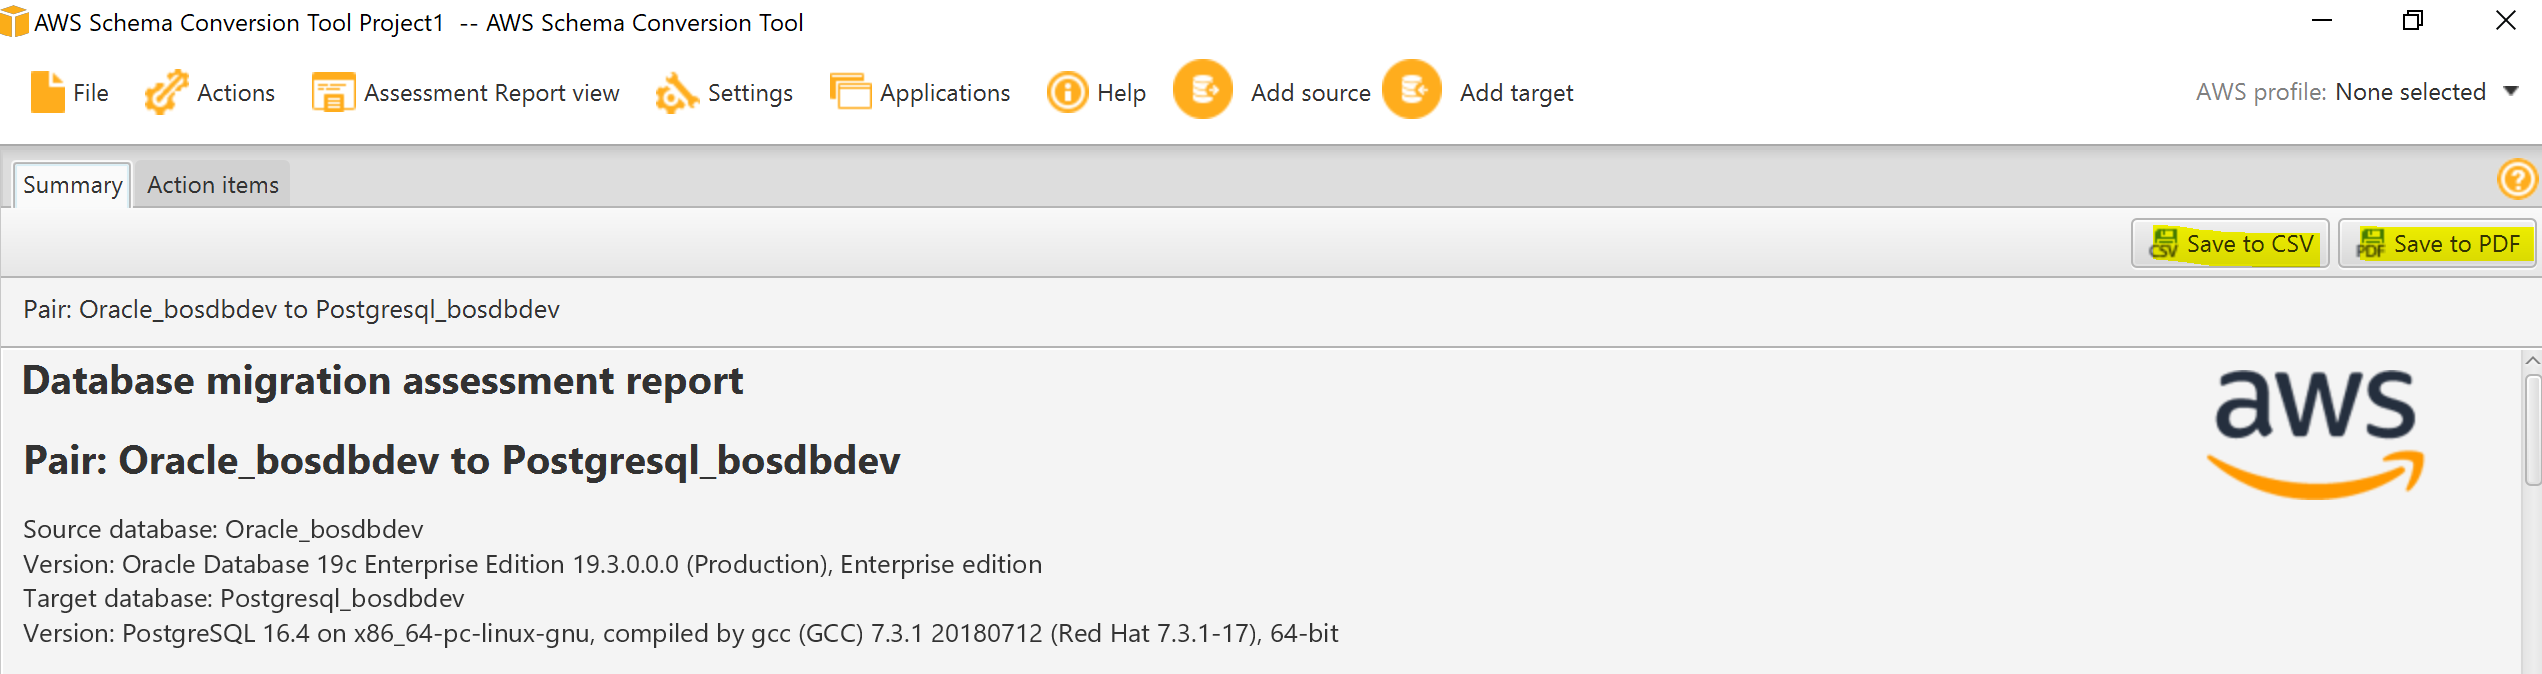

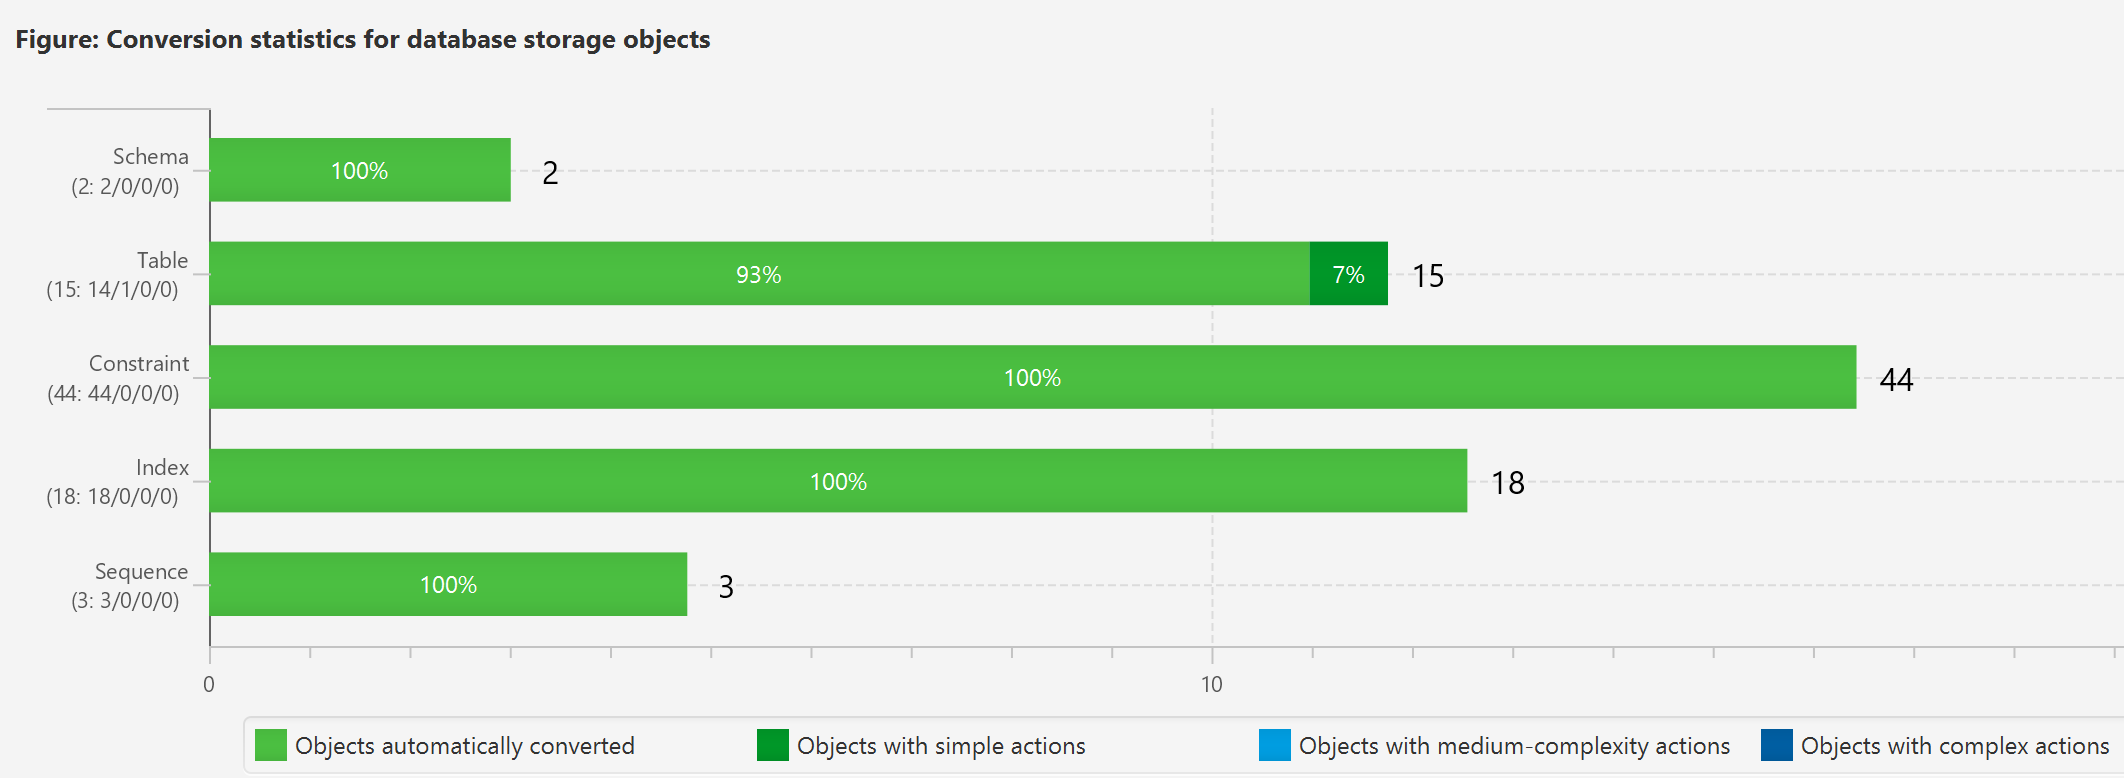

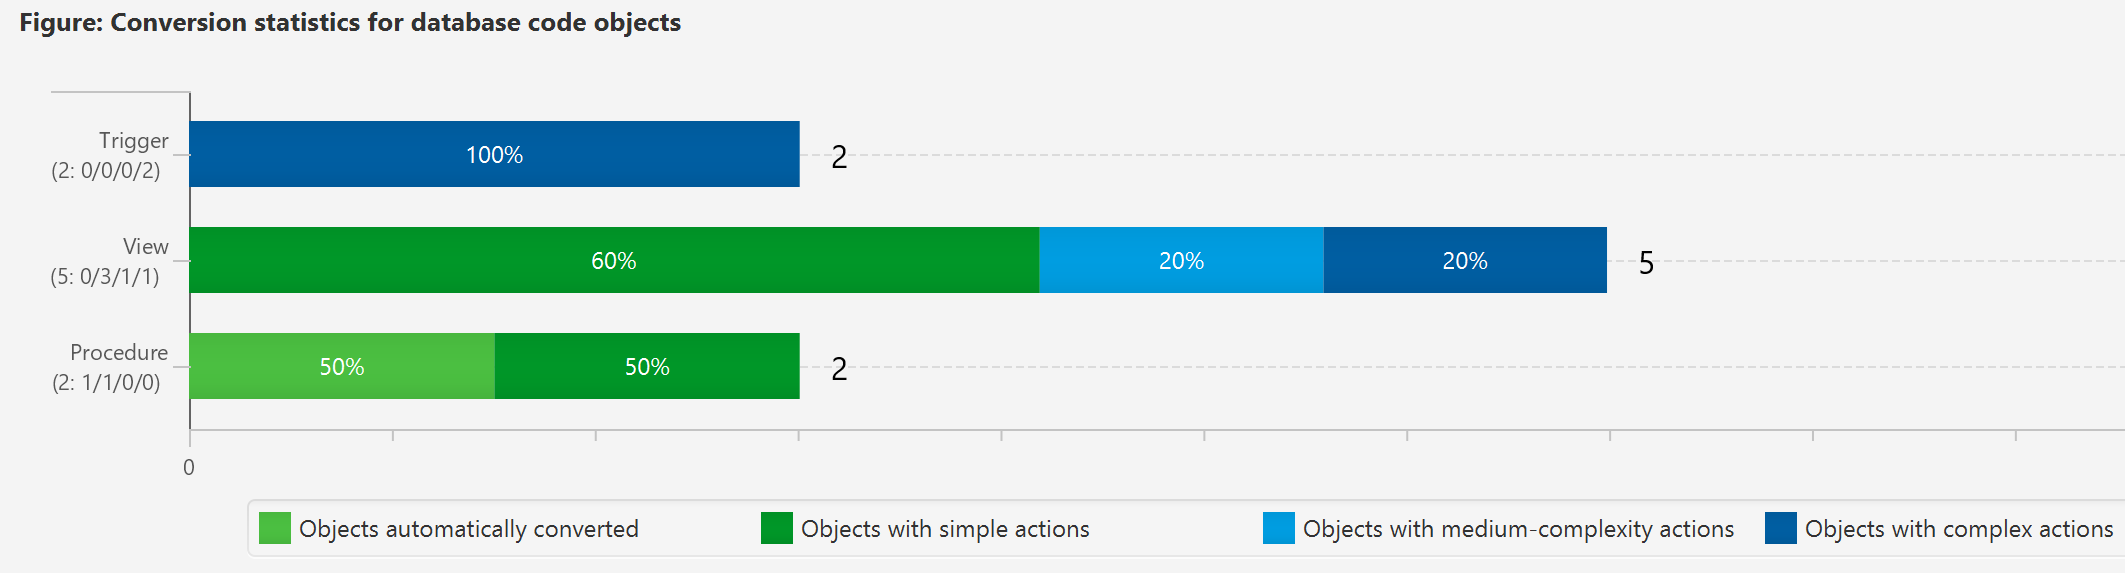

In [ ]:
For each conversion issue, you can complete one of the following actions:

Modify the objects on the source Oracle database so that AWS SCT can convert the objects to the target Amazon RDS for PostgreSQL database.

Modify the objects on the source Oracle database.

Repeat the previous steps to convert the schema and check the assessment report.

If necessary, repeat this process until there are no conversion issues.

Choose Main View from the menu. Open the context (right-click) menu for the target Amazon RDS for PostgreSQL schema, 
and choose Apply to database to apply the schema changes to the Amazon RDS for PostgreSQL database, and 
confirm that you want to apply the schema changes.

In [ ]:
Choose Main View from the menu. Open the context (right-click) menu for the target Amazon RDS for PostgreSQL schema name, and choose Save as SQL.
Next, choose a name and destination for the script.

In the script, modify the objects to correct conversion issues.

You can also exclude foreign key constraints, triggers, and secondary indexes from the script because they can cause 
problems during the migration. After the migration is complete, you can create these objects on the Amazon RDS for PostgreSQL database.

Run the script on the target Amazon RDS for PostgreSQL database.

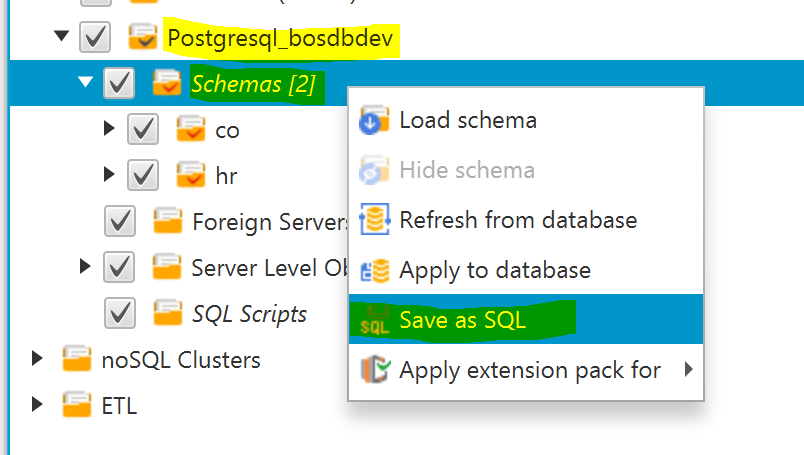

In [ ]:

@oracle_postgres_sct_create_tables_indexes.sql 

Error occurred during SQL script execution

Reason:
SQL Error [0A000]: ERROR: unique constraint on partitioned table must include all partitioning columns
  Detail: PRIMARY KEY constraint on table "time_range_sales" lacks column "time_id" which is part of the partition key.

Error occurred during SQL script execution

Reason:
SQL Error [42804]: ERROR: foreign key constraint "inventory_product_id_fk" cannot be implemented
  Detail: Key columns "product_id" and "product_id" are of incompatible types: numeric and bigint.


In [ ]:
Compare the table , index and constraints in both source and target 
-----------------------------------------------------------------------------

tables :

SELECT OWNER,COUNT(*) FROM dba_tables WHERE OWNER IN ('CO','HR')
GROUP BY OWNER;
"OWNER","COUNT(*)"
    CO,     7
    HR,     8

select schemaname,count(*) from pg_tables
where schemaname in ('co','hr') and tablename not like '%2024%'
group by schemaname;
"schemaname","count"
    co,         7
    hr,         8

table partitions: 

SELECT TABLE_OWNER ,COUNT(*) FROM dba_tab_partitions 
WHERE TABLE_OWNER IN ('CO','HR')
GROUP BY TABLE_OWNER;
"TABLE_OWNER","COUNT(*)"
    HR,         4

select schemaname,count(*) from pg_tables
where schemaname in ('co','hr') and tablename like '%2024%'
group by schemaname;
"schemaname","count"
    hr,         4


indexes : 

SELECT TABLE_OWNER ,INDEX_TYPE , COUNT(*) FROM dba_indexes 
WHERE TABLE_OWNER IN ('CO','HR')
GROUP BY TABLE_OWNER,INDEX_TYPE
ORDER BY TABLE_OWNER,INDEX_TYPE;
"TABLE_OWNER","INDEX_TYPE","COUNT(*)"
    CO,         LOB,            3
    CO,         NORMAL,         18
    HR,         IOT - TOP,      1
    HR,         NORMAL,         19

select schemaname,count(*) from pg_indexes 
where schemaname in ('co','hr')
group by schemaname;
"schemaname","count"
    co,         18
    hr,         19

constraints :

alter table co.inventory alter column store_id type int8;
alter table co.inventory alter column product_id type int8;

alter table co.orders alter column customer_id type int8;
alter table co.orders alter column store_id type int8;

alter table co.order_items alter column order_id type int8;
alter table co.order_items alter column product_id type int8;
alter table co.order_items alter column shipment_id type int8;

alter table co.shipments alter column customer_id type int8;
alter table co.shipments alter column store_id type int8;


SELECT OWNER,TABLE_NAME,COUNT(*) FROM DBA_CONSTRAINTS
WHERE OWNER IN ('CO','HR')
GROUP BY OWNER,TABLE_NAME
ORDER BY OWNER,TABLE_NAME;
"OWNER",    "TABLE_NAME",   "COUNT(*)"
    CO,     CUSTOMERS,          5
    CO,     INVENTORY,          8
    CO,     ORDERS,             9
    CO,     ORDER_ITEMS,        10
    CO,     PRODUCTS,           3
    CO,     SHIPMENTS,          9
    CO,     STORES,             5
    HR,     COUNTRIES,          3
    HR,     DEPARTMENTS,        4
    HR,     EMPLOYEES,          10
    HR,     EMP_DETAILS_VIEW,   1
    HR,     JOBS,               2
    HR,     JOB_HISTORY,        9
    HR,     LOCATIONS,          3
    HR,     REGIONS,            2
    HR,     TIME_RANGE_SALES,   1

select table_schema ,table_name , count(*)
from information_schema.table_constraints 
where table_schema in ('co','hr')
group by table_schema ,table_name
order by table_schema ,table_name;
"table_schema","table_name","count"
    co,         customers,      5
    co,         inventory,      8
    co,         order_items,    10
    co,         orders,         9
    co,         products,       3
    co,         shipments,      9
    co,         stores,         5
    hr,         countries,      3
    hr,         departments,    5   --  extra check constraint
    hr,         employees,      11  --
    hr,         job_history,    9
    hr,         jobs,           3   --
    hr,         locations,      4   --
    hr,         regions,        2
    hr,         time_range_sales,1
    hr,         time_range_sales_sales_apr2024,1
    hr,         time_range_sales_sales_feb2024,1
    hr,         time_range_sales_sales_jan2024,1
    hr,         time_range_sales_sales_mar2024,1
